# OKCupid Match Maker

## Introduction
In this project, we will be dissecting data from the on-line dating platform
[OkCupid.com](https://www.okcupid.com/). Like many other digital dating applications, OKC utilizes many forms
of analysis to promote recommendations to their users and derive "matches" between users.


Our project goal is to scope, prepare, define, analyze, and create a machine learning
model to predict a user's astrological sign.

## Scoping
With any new project, it is critical to its success to fully define our data, process, progress markers, and outcomes.
The first section will be devoted to our overall project goals and high-level objectives. The second is devoted to our
data, and if the project goals can be met with it. Third, the analysis will define the methods and
questions to see if they meet our project goals. Finally, our evaluation with flesh out our conclusions
and findings derived over the course of the project.

### Project Goals

Our principle goal will be to apply data analysis and machine learning to techniques to a unique
and diverse data set.

We will investigate and evaluate the data in an attempt to produce a machine learning model that can accurately predict a user's astrological zodiac sign. Additionally, we will test its performance and generalizeability outside our data set.

### Data
The project will utilize a dataset named `profiles.parquet`, a set of deidentified user data provided by [OkCupid.com](https://www.okcupid.com/) Each row represents a user's profile and the columns contain their responses to various profile criteria.

### Analysis
We will use descriptive statistics and data visualization to describe our dataset,
including its distribution, count, and relationship between variables. Our sign prediction
will make use of classification algorithms from supervised learning models.

### Evaluation
Our machine model evaluation will be validated via a test dataset.
Our prediction accuracy will be checked through a confusion matrix,
accuracy, precision, recall, F1, and Kappa scores.

### Importing Libraries
We will be utilizing pandas and numpy for data analysis and organization,
and matplotlib and seaborn for visualization.
Sklearn will be used to develop our model and test it.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from matplotlib import pyplot as plt
import seaborn as sns

# setting up figs
# plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

## Loading the Data

In [2]:
okc = pd.read_parquet('profiles.parquet')
print(okc.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially       None   
3   23            thin         vegetarian  socially       None   
4   29        athletic               None  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

#### Data Structure
The data contains 59946 rows and 31 columns.

The columns include:

A series of short answer questions:
- **essay0**: My self summary
- **essay1**: What I'm doing with my life
- **essay2**: I'm really good at
- **essay3**: The first thing people usually notice about me
- **essay4**: Favorite books, movies, show, music, and food
- **essay5**: The six things I could never do without
- **essay6**: I spend a lot of time thinking about
- **essay7**: On a typical Friday night I am
- **essay8**: The most private thing I am willing to admit
- **essay9**: You should message me if...

And personal questions:
- **age**: age of user, continuous variable
- **body_type**: body type of user, categorical variable
- **diet**: dietary information/preferences, categorical variable
- **drinks**: alcohol consumption, categorical variable
- **drugs**: drug usage, categorical variable
- **education**: educational achievement, categorical variable
- **ethnicity**: ethnic background, categorical variable
- **height**: user height, continuous variable
- **income**: user income, continuous variable
- **job**: employment description, categorical variable
- **last_online**: last login of user, date variable
- **location**: user location, categorical variable
- **offspring**: children status of user, categorical variable
- **orientation**: sexual orientation, categorical variable
- **pets**: pet preferences, categorical variable
- **religion**: religious background of user, categorical variable
- **sex**: user gender description, categorical variable
- **sign**: user astrological sign, categorical variable
- **smokes**: smoking habits, categorical variable
- **speaks**: language fluency, categorical variable
- **status**: relationship status of user, categorical variable

In [3]:
print(okc.shape)
print(list(okc.columns))

(59946, 31)
['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job', 'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status']


## Exploring the Data

First, let's check the column values to make sure they line up with what we expect.

In [4]:
print('n-number of categories:', okc.sign.nunique())
print('categories:', okc.sign.unique())

n-number of categories: 48
categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' None
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'sco

Unfortunately, this data is pretty messy.
For our current investigation we're not overly concerned with the
qualifiers attached to the signs, so let's consolidate it down to the core categories.


In [5]:
okc['signs_cleaned'] = okc.sign.str.split().str.get(0)
print('n-number of categories:', okc.sign.nunique())
print('categories:', okc.sign.unique())

print(okc.signs_cleaned.value_counts())

n-number of categories: 48
categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' None
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'sco

## Continuous Variables

### Age

This is the age distribution of the data. Most users appear to be from 20-40 years old.

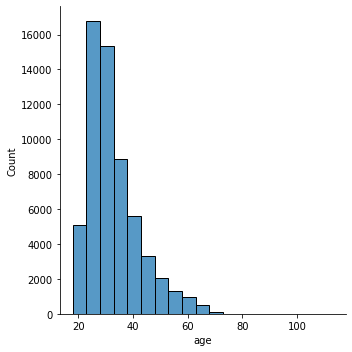

In [6]:
sns.displot(
    data = okc,
    x = 'age',
    kind= 'hist',
    binwidth = 5
)

If we proportion this plot by gender it appears that for this dataset both the male and female age distributions are remarkably similar.

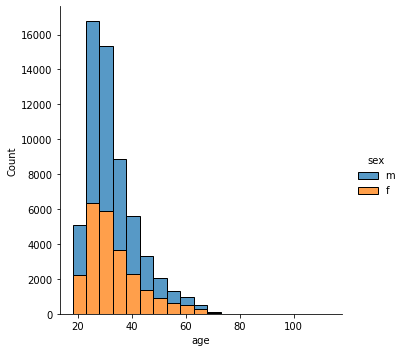

In [7]:
sns.displot(
    data = okc,
    x = 'age',
    hue = 'sex',
    kind = 'hist',
    binwidth = 5,
    multiple = 'stack'
)

### Height

Most users fall between 65 and 75 centimeters in height.

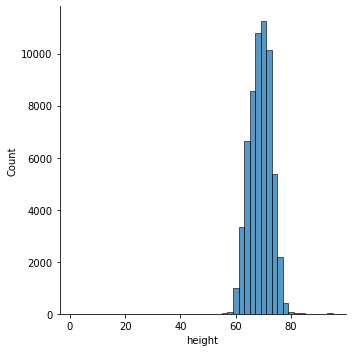

In [8]:
sns.displot(
    data = okc,
    x = 'height',
    kind = 'hist',
    binwidth = 2
)

When segmented by sex it becomes clear that the female userbase is shorter than the male base.

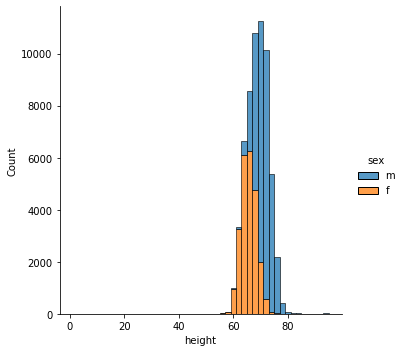

In [9]:
sns.displot(
    data = okc,
    x = 'height',
    hue = 'sex',
    kind = 'hist',
    binwidth = 2,
    multiple = 'stack'
)

### Income

Since most users don't include income in their profile our largest proportion is at `-1`.

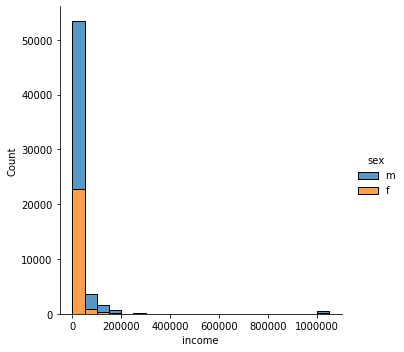

In [10]:
sns.displot(
    data = okc,
    x = 'income',
    hue = 'sex',
    kind = 'hist',
    binwidth = 50000,
    multiple = 'stack'
)

## Discrete Variables

### Sex

The majority of OKC users are male.

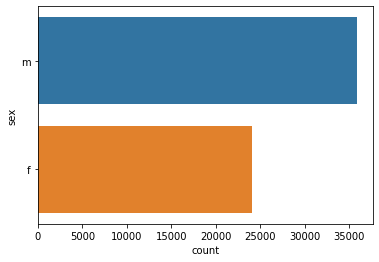

In [11]:
sns.countplot(
    data = okc,
    y = 'sex'
)

### Body Type

Most users decribe themselves as `average`, followed by `fit`, and `athletic`.

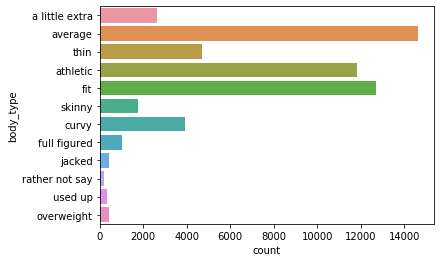

In [12]:
sns.countplot(
    data = okc,
    y = 'body_type'
)

The most popular self-descriptions by women are `average`, `fit`, and `curvy`, in descending order.

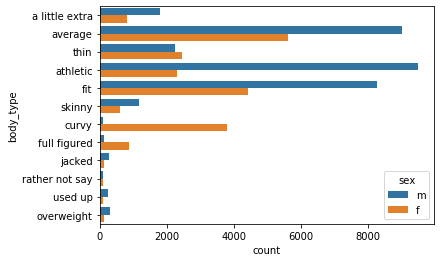

In [13]:
sns.countplot(
    data = okc,
    y = 'body_type',
    hue = 'sex'
)

### Diet

Most users identify themselves as eating `anything` (with some qualifier) followed by `vegetarian`. 

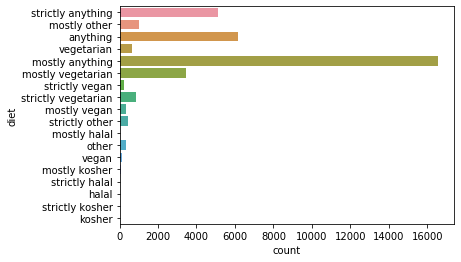

In [14]:
sns.countplot(
    data = okc,
    y = 'diet'
)

### Drinks

By far the largest percentage of OKC's users report drinking `socially`.

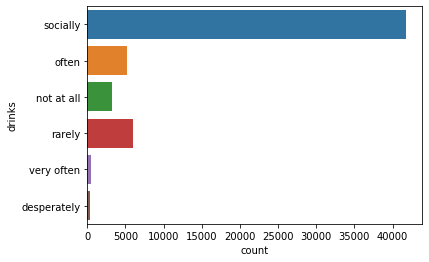

In [15]:
sns.countplot(
    data = okc,
    y = 'drinks'
)

### Drugs

Few OKC users report imbibing illicit drugs `often`, with the majority stating `never`.

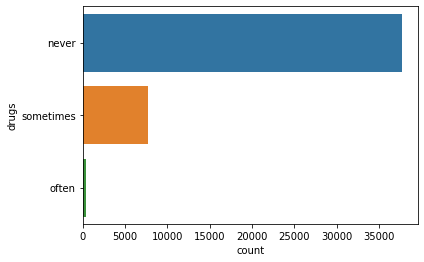

In [16]:
sns.countplot(
    data = okc,
    y = 'drugs'
)

### Education

The highest proportion of users have graduated from university/college, or are enrolled in a masters level education program.

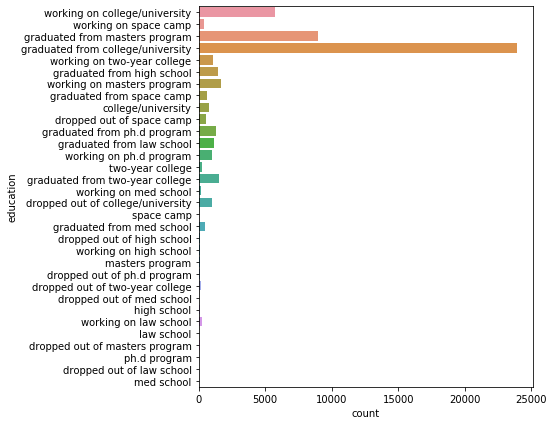

In [17]:
plt.figure(figsize=(6, 7))
sns.countplot(
    data = okc,
    y = 'education'
)

### Jobs

Unlike the other categories the occupation spread among the userbase is quite diverse, with most reporting as `other`.

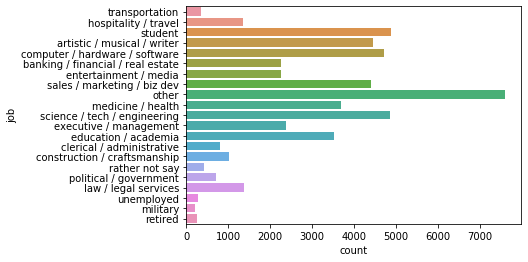

In [18]:
sns.countplot(
    data = okc,
    y = 'job'
)

### Offspring

Most users do not have kids. This is not surprising on a website designed to potentiate romatic matches.

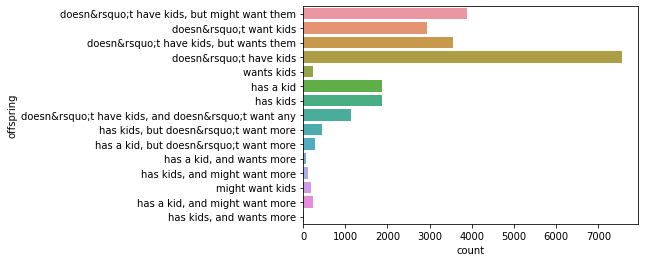

In [19]:
sns.countplot(
    data = okc,
    y = 'offspring'
)

### Orientation

The majority of users are `straight` followed by `gay`.

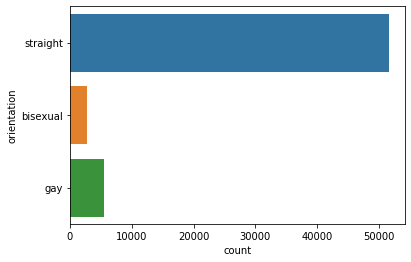

In [20]:
sns.countplot(
    data = okc,
    y = 'orientation'
)

When broken down by sex there is a much higher proportion of females than males reporting as `bisexual`.

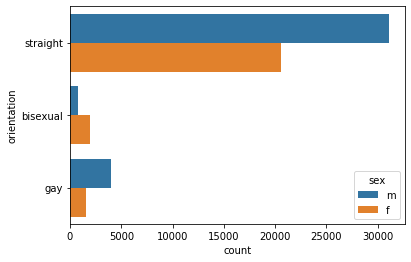

In [21]:
sns.countplot(
    data = okc,
    y = 'orientation',
    hue = 'sex',
)

### Pets

Most all users either like or have dogs and cats.

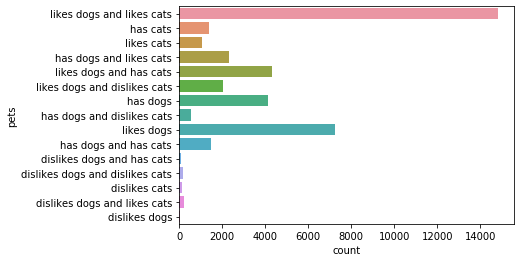

In [22]:
sns.countplot(
    data = okc,
    y = 'pets'
)

### Religion

Like the occupation category, this question is also very diverse. Unfortunately it also has associated qualifiers that segments the data.

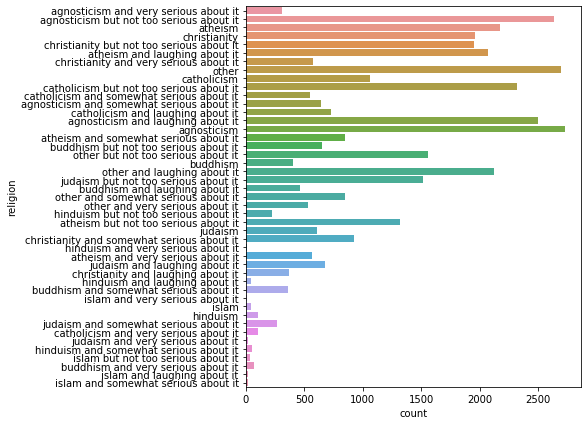

In [23]:
plt.figure(figsize=(6,7))
sns.countplot(
    data = okc,
    y = 'religion'
)

Let's clean the data into overarching categories to prepare it for our ML models.

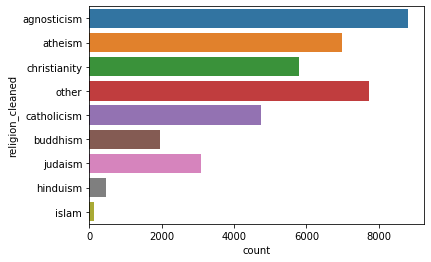

In [24]:
okc['religion_cleaned'] = okc.religion.str.split().str.get(0)
sns.countplot(
    data = okc,
    y = 'religion_cleaned'
)

### Signs

There is a roughly even distribution among the zodiac signs.

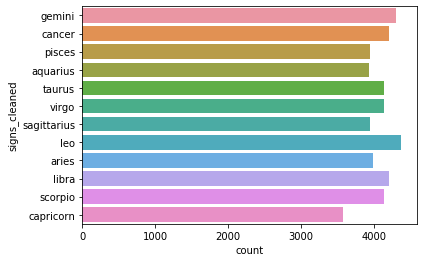

In [25]:
sns.countplot(
    data = okc,
    y = 'signs_cleaned'
)

### Smoking

Most users don't smoke or only smoke occasionally.

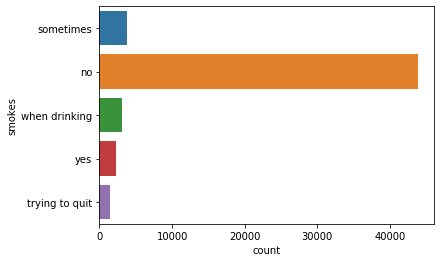

In [26]:
sns.countplot(
    data = okc,
    y = 'smokes'
)

### Status

Since OKC is primarily a platform users to find romantic partners, it is not surprising that most of its users identify as single.

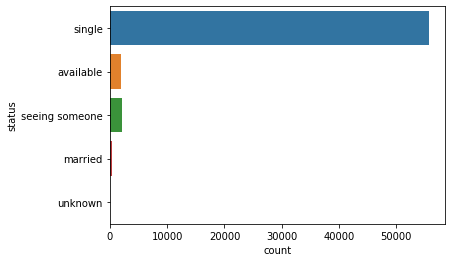

In [27]:
sns.countplot(
    data = okc,
    y = 'status'
)

## Data Preparation

### Missing Data

Below is the counts of missing data we for each user in our set, arranged by column. 

In [28]:
print(okc.isnull().sum())

age                     0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
orientation             0
pets                19921
religion            20226
sex                     0
sign                11056
smokes               5512
speaks                 50
status                  0
signs_cleaned       11056
religion_cleaned    20226
dtype: int64


## Preprocessing

Good models come from good data.
To best accomplish this, we usually need to preproccess our inputs to ensure accurate results.
Since the set is relatively large, we can afford to deal with null values by simply dropping them from the set.

In [29]:
# selecting our relevant columns
cols = ['body_type', 'diet', 'orientation', 'pets', 'religion_cleaned',
       'sex', 'job', 'drinks', 'education', 'signs_cleaned']
df = okc[cols].dropna()

print(df.shape)

(15640, 10)


### Dummy Variables

Since the `signs` are categorical variables, they require some processing in order to work in our machine models.
We'll use one-hot encoding to turn these into values with binary identifiers (in the form of columns).

In [30]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [31]:
print(df.head())

  signs_cleaned  body_type_a little extra  body_type_athletic  \
0        gemini                         1                   0   
1        cancer                         0                   0   
5        taurus                         0                   0   
7   sagittarius                         0                   0   
9        cancer                         0                   1   

   body_type_average  body_type_curvy  body_type_fit  body_type_full figured  \
0                  0                0              0                       0   
1                  1                0              0                       0   
5                  1                0              0                       0   
7                  1                0              0                       0   
9                  0                0              0                       0   

   body_type_jacked  body_type_overweight  body_type_rather not say  ...  \
0                 0                     0           

### Label Imbalance

Fortunately our investigatory fields have similar counts, and label imbalance shouldn't
dramatically impact our model.

In [32]:
print(df.signs_cleaned.value_counts())

leo            1432
gemini         1421
virgo          1382
cancer         1380
taurus         1311
scorpio        1297
libra          1287
pisces         1270
aries          1263
sagittarius    1252
aquarius       1219
capricorn      1126
Name: signs_cleaned, dtype: int64


### Splitting the Data
To start, we split our data into training and validation sets. We'll reserve 20% for the testing.

In [33]:
# getting the length num columns
col_length = len(df.columns)

# selecting the dataframe into x, y : y is our target
x = df.iloc[:, 1:col_length]
y = df.iloc[:, 0:1]

# splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 92)

#turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

## Prediction

Finally our data is cleaned and split! Now we can move on to building our models and deriving the best
method(s) for prediction!

#### Evaluation Metrics

We will judge our models based on some common statistical metrics. Some of our most important forumlas are below:

$$Accuracy = \frac{TP + TN}{TP+TN+FP+FN}$$

$$Recall = \frac{TP}{TP+FN}$$

$$Precision = \frac{TP}{TP+FP}$$

$$F_{1} = \frac{2}{\frac{1}{Recall}+\frac{1}{Precision}}$$

Below are descriptions of the metrics:

- **Accuracy:** The number of correct values divided by total values.
- **Precision:** The True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall:** The True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score:** A blended score of precision and recall which balances both values.
- **Macro Avg:** The unweighted mean value of precision and recall.
- **Weighted Avg:** The weighted mean value of precision and recall by the support values for each class.
- **Support:** The number of observations in class to predict.

#### Helper Functions

We need to define some helper functions to make this data easier to interpret.

In [34]:
# generation of a confusion matrix
def heatmap_gen(cm, title, labels):
    '''
    Generate a heatmap from a confusion matrix and display
    param: confusion matrix, title, dataset labels
    output: none
    '''
    plt.figure(figsize=(10,7))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt='d')

    # labels, title and ticks
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title(title)
    ax.yaxis.set_tick_params(rotation=360)
    ax.xaxis.set_tick_params(rotation=90)
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

### Logistic Regression

The first will be standard Logistic Regression.
We have to use a multinomial probability due to our number of classes.

In [35]:
lr_model = LogisticRegression(multi_class="multinomial").fit(x_train, y_train)
lr_predictions = lr_model.predict(x_train)

# showing our report
print(classification_report(y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.14      0.06      0.08       975
       aries       0.13      0.11      0.12      1007
      cancer       0.14      0.20      0.17      1107
   capricorn       0.12      0.04      0.06       892
      gemini       0.14      0.19      0.16      1133
         leo       0.13      0.17      0.15      1151
       libra       0.14      0.12      0.13      1019
      pisces       0.14      0.14      0.14      1020
 sagittarius       0.13      0.12      0.13      1004
     scorpio       0.12      0.09      0.10      1030
      taurus       0.12      0.11      0.11      1047
       virgo       0.13      0.20      0.16      1127

    accuracy                           0.13     12512
   macro avg       0.13      0.13      0.12     12512
weighted avg       0.13      0.13      0.13     12512



Unfortunately, our accuracy was not very good (13%).
This is only slightly better than a random guess (1/12 = 8%).

### K Nearest Neighbor

The next models is the `KNeighborsClassifier` which will compare of it's neighbors to predict the signs.
The default value for `n_neighbors` is 5, but we'll tune that slightly to optimize our scoring.

In [36]:
# dict for n_neighbors scores
knn_scores = {}
for i in range(5, 20):
    knn_model = KNeighborsClassifier(n_neighbors = i, n_jobs=-1).fit(x_train, y_train)
    # knn_predictions = knn_model.predict(x_train)
    knn_scores[i] = knn_model.score(x_test, y_test)
best_knn = KNeighborsClassifier(n_neighbors = max(knn_scores, key=knn_scores.get), n_jobs=-1).fit(x_train, y_train)

print(f'The best score ({max(knn_scores.values())}) comes from a k equal to {max(knn_scores, key=knn_scores.get)}!')

# getting our best prediction
best_knn_prediction = best_knn.predict(x_train)

print(classification_report(y_train, best_knn_prediction))

The best score (0.08312020460358056) comes from a k equal to 5!
              precision    recall  f1-score   support

    aquarius       0.25      0.65      0.37       975
       aries       0.26      0.53      0.35      1007
      cancer       0.32      0.45      0.37      1107
   capricorn       0.33      0.34      0.34       892
      gemini       0.38      0.33      0.35      1133
         leo       0.39      0.29      0.34      1151
       libra       0.42      0.27      0.33      1019
      pisces       0.40      0.25      0.31      1020
 sagittarius       0.43      0.23      0.30      1004
     scorpio       0.42      0.25      0.31      1030
      taurus       0.45      0.23      0.31      1047
       virgo       0.44      0.25      0.32      1127

    accuracy                           0.34     12512
   macro avg       0.37      0.34      0.33     12512
weighted avg       0.38      0.34      0.33     12512



At 34%, there is still much to be desired. Let's take a look at the confusion matrix and then investigate another model.

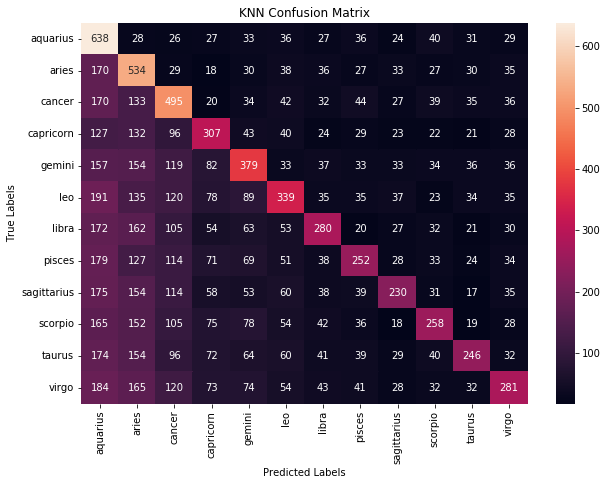

In [37]:
heatmap_gen(
    cm = confusion_matrix(y_train, best_knn_prediction),
    title = 'KNN Confusion Matrix',
    labels = best_knn.classes_
)

### Decision Trees

The last model we'll be investigating is the decision tree.
We can leave the `max_depth` at `none` in order to expand until all leaves are pure or minimized.

In [38]:
tree_model = DecisionTreeClassifier().fit(x_train, y_train)
tree_predictions = tree_model.predict(x_train)

# getting our report from the tree
print(classification_report(y_train, tree_predictions))

              precision    recall  f1-score   support

    aquarius       0.87      0.99      0.93       975
       aries       0.85      0.97      0.90      1007
      cancer       0.89      0.97      0.93      1107
   capricorn       0.88      0.95      0.91       892
      gemini       0.92      0.93      0.93      1133
         leo       0.93      0.93      0.93      1151
       libra       0.95      0.92      0.93      1019
      pisces       0.96      0.89      0.92      1020
 sagittarius       0.96      0.90      0.93      1004
     scorpio       0.98      0.90      0.94      1030
      taurus       0.99      0.88      0.93      1047
       virgo       0.98      0.88      0.93      1127

    accuracy                           0.93     12512
   macro avg       0.93      0.93      0.93     12512
weighted avg       0.93      0.93      0.93     12512



This is significantly better, 93%!
However, would a Random Forest provide us with better accuracy?

In [39]:
# dict for forest scores
forest_scores = {}
for i in range(10, 100):
    forest = RandomForestClassifier(random_state=92, n_estimators=i, n_jobs=-1).fit(x_train, y_train)
    forest_scores[i] = forest.score(x_test, y_test)

print(f'The best score ({max(forest_scores.values())}) comes from a forest with {max(forest_scores, key=forest_scores.get)} trees!')

# making optimized forest
forest_model = RandomForestClassifier(random_state=92, n_estimators=max(forest_scores, key=forest_scores.get), n_jobs=-1).fit(x_train, y_train)
forest_predictions = forest_model.predict(x_train)

# printing report
print(classification_report(y_train, forest_predictions))

The best score (0.08951406649616368) comes from a forest with 22 trees!
              precision    recall  f1-score   support

    aquarius       0.93      0.94      0.94       975
       aries       0.90      0.92      0.91      1007
      cancer       0.92      0.94      0.93      1107
   capricorn       0.93      0.91      0.92       892
      gemini       0.92      0.93      0.93      1133
         leo       0.93      0.93      0.93      1151
       libra       0.92      0.93      0.93      1019
      pisces       0.92      0.92      0.92      1020
 sagittarius       0.94      0.92      0.93      1004
     scorpio       0.95      0.92      0.93      1030
      taurus       0.93      0.92      0.93      1047
       virgo       0.93      0.93      0.93      1127

    accuracy                           0.93     12512
   macro avg       0.93      0.93      0.93     12512
weighted avg       0.93      0.93      0.93     12512



It looks like it's still 93% overall, but take a closer look at the breakdown of our labels.
It seems that the random forest provided a much more balanced distribution of precision and recall.

We can visualize the results as a confusion matrix, which holds True values on the Y-axis
and Predicted values on the X-axis.
The more dense the diagonal line, the more correct our predictions.

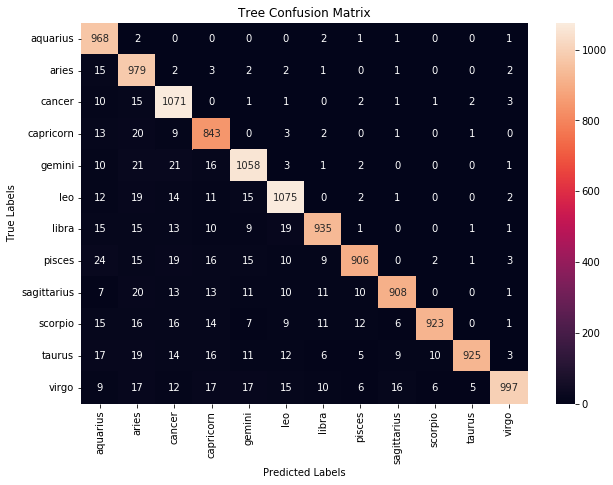

In [40]:
# tree heatmap
heatmap_gen(
    cm = confusion_matrix(y_train, tree_predictions),
    title = 'Tree Confusion Matrix',
    labels = tree_model.classes_
)

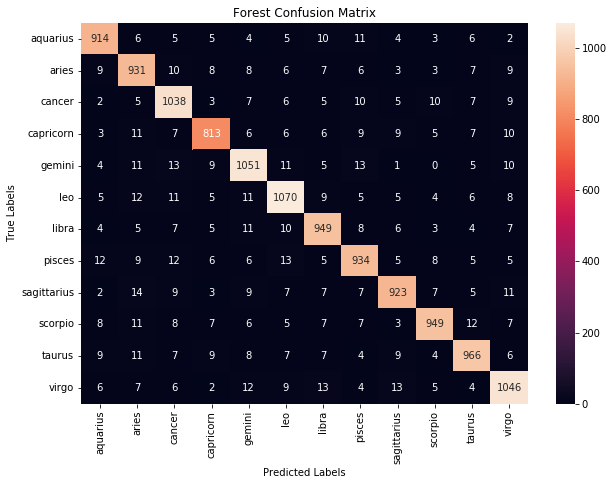

In [41]:
# forest heatmap
heatmap_gen(
    cm = confusion_matrix(y_train, forest_predictions),
    title = 'Forest Confusion Matrix',
    labels = forest_model.classes_
)

We can also explore the details of our tree. Let's first take a look at the depth.

In [42]:
# depth of the tree
tree_model.get_depth()

65

With a depth of 65, it is unlikely that we will be able to generalize this to
another dataset. This is very likely overfit for the data.
In order to support this theory, we can perform a five-fold cross-validation of the data.

In [43]:
kf = KFold(n_splits=5, shuffle=True, random_state=92)

results_tree = cross_val_score(tree_model, x_train, y_train, cv=kf, scoring='accuracy')
results_forest = cross_val_score(forest_model, x_train, y_train, cv=kf, scoring='accuracy')

print(f'Tree results: {results_tree}')
print('Baseline: %.2f%% (%.2f%%)\n' % (results_tree.mean()*100, results_tree.std()*100))

print(f'Forest results: {results_forest}')
print('Baseline: %.2f%% (%.2f%%)' % (results_forest.mean()*100, results_forest.std()*100))

Tree results: [0.09548542 0.07950459 0.08473221 0.08393285 0.09072742]
Baseline: 8.69% (0.56%)

Forest results: [0.07750699 0.0970835  0.08673062 0.09152678 0.09192646]
Baseline: 8.90% (0.66%)


A cross-validation of the data shows expectedly poor results (8-9%).

### Final Model

So our KNN model seems to be the most appropriate for predicting the zodiac sign in an empty field.
However, let's attempt to tune the algorithm one last time before pursing other methods.
Do the distance metric influence the accuracy of the algorithm in this set?
What about our other parameters?

Let's perform a search of the optimal parameters with `grid_search`.

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
# estimator knn
est_knn = KNeighborsClassifier(algorithm='auto')

# param for grid
param_knn = {
    'n_neighbors': (1,20, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
    }

# loading the params into the grid
grid = GridSearchCV(
    estimator = est_knn,
    param_grid = param_knn,
    scoring = 'accuracy',
    n_jobs = -1, # for parallelization
    cv = 5,
)

In [46]:
# fitting the grid
knn = grid.fit(x_train, y_train)

# showing optimal params
print(grid.best_params_ )

# the mean cross-validated score of the best_estimator
print('Best KNN Score: ', grid.best_score_ )

{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 20, 'p': 2, 'weights': 'distance'}
Best KNN Score:  0.0883150930314478


In [47]:
# creating a new classifier and passing the best params, ** is to unpack dict
bknn = KNeighborsClassifier(**grid.best_params_).fit(x_train, y_train)

bknn_pred = bknn.predict(x_train)

print(classification_report(y_train, bknn_pred))

              precision    recall  f1-score   support

    aquarius       0.87      0.99      0.93       975
       aries       0.85      0.97      0.90      1007
      cancer       0.89      0.97      0.93      1107
   capricorn       0.88      0.95      0.91       892
      gemini       0.92      0.93      0.93      1133
         leo       0.93      0.93      0.93      1151
       libra       0.95      0.92      0.93      1019
      pisces       0.96      0.89      0.92      1020
 sagittarius       0.96      0.90      0.93      1004
     scorpio       0.98      0.90      0.94      1030
      taurus       0.99      0.88      0.93      1047
       virgo       0.98      0.88      0.93      1127

    accuracy                           0.93     12512
   macro avg       0.93      0.93      0.93     12512
weighted avg       0.93      0.93      0.93     12512



Wow what a difference! We improved from 34% to 93%!

However, this may have the same issue as our trees and forests.
In other words, the data may be overfit and not as generalizable.

Let's take a look at the heatmap first.

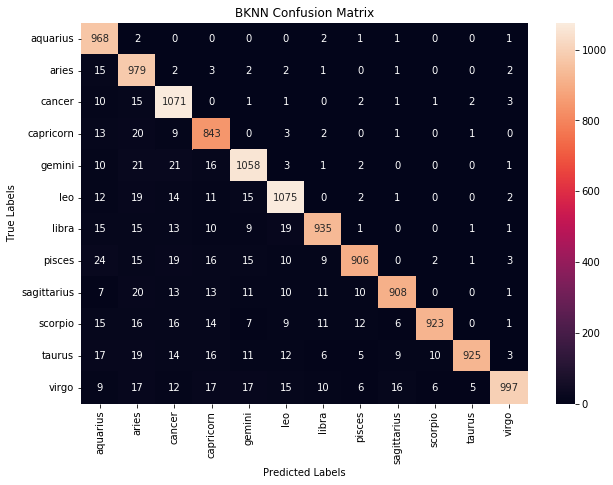

In [48]:
heatmap_gen(
    cm = confusion_matrix(y_train, bknn_pred),
    title = 'BKNN Confusion Matrix',
    labels = bknn.classes_
)

Now we perform cross-validation again, and then look at the confusion matrix heatmap and compare it to our test set.

In [49]:
kf = KFold(n_splits=5, shuffle=True, random_state=92)

results_bknn = cross_val_score(bknn, x_train, y_train, cv=kf, scoring='accuracy')

print(f'Tree results: {results_bknn}')
print('Baseline: %.2f%% (%.2f%%)\n' % (results_bknn.mean()*100, results_bknn.std()*100))

Tree results: [0.07870555 0.08949261 0.08752998 0.08832934 0.0891287 ]
Baseline: 8.66% (0.40%)



              precision    recall  f1-score   support

    aquarius       0.10      0.11      0.10       244
       aries       0.06      0.08      0.07       256
      cancer       0.06      0.07      0.07       273
   capricorn       0.08      0.07      0.07       234
      gemini       0.07      0.08      0.07       288
         leo       0.06      0.07      0.07       281
       libra       0.09      0.07      0.08       268
      pisces       0.06      0.06      0.06       250
 sagittarius       0.07      0.06      0.07       248
     scorpio       0.06      0.04      0.05       267
      taurus       0.12      0.08      0.10       264
       virgo       0.09      0.09      0.09       255

    accuracy                           0.08      3128
   macro avg       0.08      0.08      0.08      3128
weighted avg       0.08      0.08      0.08      3128



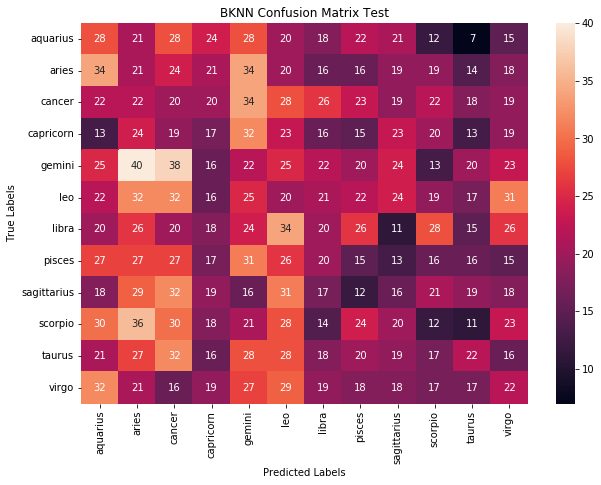

In [50]:
bknn_pred_test = bknn.predict(x_test)
print(classification_report(y_test, bknn_pred_test))

heatmap_gen(
    cm = confusion_matrix(y_test, bknn_pred_test),
    title = 'BKNN Confusion Matrix Test',
    labels = bknn.classes_
)


It's pretty clear from the matrix that there are inconsistencies in the classification.
With gemini being predicted quite frequently (noted by its "hot" vertical band) and capricorn infrequently, relatively speaking.

Regardless, our predictions from this strategy perform well on our training set but generalize poorly.

## Conclusion

In this investigation, we used a variety of machine learning methods to predict astrological signs based on data
from OkCupid users.
Despite its seeming irrelevance, there are significant proportions of those who believe strongly in
romantic and spirtual compatibility between certain zodiac signs.
Thus if this data can be estimated for those who do not have sign information in their profile, it could lead to improved recommendation algorithms.

Unfortunately, our model did not do much better than randomly guessing a sign.

## Further Research

In the future a risk/benefit analysis could be performed to determine if the predicting of a user's zodiac sign is reasonably possible with additional factors or data cleaning, in comparison to the benefit of an improved recommendation algorithm.

Additionally, we could perform the analysis with different ML models or more finely tune the parameters of each. We could also split and proportion our data so that the training and testing sets are more similar to one another, thus providing better models.

#### Data Sources:
`profiles.csv` was provided by [OKCupid](https://www.okcupid.com/) and [Codecademy.com](https://www.codecademy.com/)